In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as pyplot

In [0]:
dataset = pandas.read_csv("train.csv")
dataset.fillna(dataset.mean(axis=0), inplace= True)

In [318]:
values = dataset.values
"""X = dataset.iloc[:,0:27]
Y = dataset.iloc[:,85]"""

'X = dataset.iloc[:,0:27]\nY = dataset.iloc[:,85]'

In [0]:
def supervised(data, n=1, m=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
  

	for i in range(n, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    

	for i in range(0, m):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

      
	agg = pd.concat(cols, axis=1)
	agg.columns = names 
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [0]:
norm = MinMaxScaler(feature_range=(0, 1))
scaleddata = norm.fit_transform(values)
newdata = supervised(scaleddata, 1, 1)
newdata= newdata.values

In [0]:
#print(reframed.head())

In [0]:
train_X = newdata[:,0:27]
train_y = newdata[:,85]

In [0]:
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [324]:
test_data = pandas.read_csv('test_2.csv')
test_data.fillna(dataset.mean(axis = 0), inplace = True)
test_X = values[:,0:27]
test_y = values[:,85]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(39999, 1, 27) (39999,) (40000, 1, 27) (40000,)


In [0]:
from keras.layers.recurrent import LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [326]:
history = model.fit(train_X, train_y, epochs=500, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 39999 samples, validate on 40000 samples
Epoch 1/500
 - 4s - loss: 0.0274 - val_loss: 0.2147
Epoch 2/500
 - 1s - loss: 0.0144 - val_loss: 0.1924
Epoch 3/500
 - 1s - loss: 0.0136 - val_loss: 0.2048
Epoch 4/500
 - 1s - loss: 0.0131 - val_loss: 0.4591
Epoch 5/500
 - 1s - loss: 0.0129 - val_loss: 0.5553
Epoch 6/500
 - 1s - loss: 0.0129 - val_loss: 0.5598
Epoch 7/500
 - 1s - loss: 0.0128 - val_loss: 0.5789
Epoch 8/500
 - 1s - loss: 0.0127 - val_loss: 0.5896
Epoch 9/500
 - 1s - loss: 0.0126 - val_loss: 0.6177
Epoch 10/500
 - 1s - loss: 0.0127 - val_loss: 0.7575
Epoch 11/500
 - 1s - loss: 0.0125 - val_loss: 0.7645
Epoch 12/500
 - 1s - loss: 0.0126 - val_loss: 0.7648
Epoch 13/500
 - 1s - loss: 0.0125 - val_loss: 0.7572
Epoch 14/500
 - 1s - loss: 0.0124 - val_loss: 0.7516
Epoch 15/500
 - 1s - loss: 0.0124 - val_loss: 0.7499
Epoch 16/500
 - 1s - loss: 0.0123 - val_loss: 0.7623
Epoch 17/500
 - 1s - loss: 0.0122 - val_loss: 0.7595
Epoch 18/500
 - 1s - loss: 0.0123 - val_loss: 0.7553
Epoch

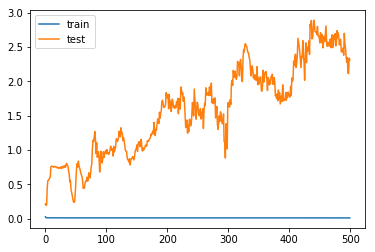

In [327]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()